<a href="https://colab.research.google.com/github/aymuos/starship/blob/main/fundamental_EDA/actuallyWorking/d5c_seperator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objective

- translate cities from chinese to english cities
- break down into 3 different csvs.
- clean data
- show data distribution

In [3]:
from google.colab import drive
drive.mount('/content/drive')

base = '/content/drive/MyDrive/ml/PROCESSED/matched'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

In [4]:
# wdata = pd.read_csv(base+"/delivery_five_cities.csv")

wdata = pd.read_csv(base+"/d5c_neat.csv")

In [5]:
names = wdata['from_city_name'].unique()

In [6]:
wdata.head()

,order_id,from_dipan_id,from_city_name,delivery_user_id,poi_lng,poi_lat,aoi_id,typecode,receipt_time,receipt_lng,receipt_lat,sign_time,sign_lng,sign_lat,ds
0,55be8cdf1270526231c9ba3387f51b54,c5ac5ba99801aa6b85ba473d9260512b,重庆市,df0b594618d1ba6f619e4e7dd034447c,8.899874e+06,-7.684936e+06,9c0f96ff01a71477334ef563001abc72,203ac3454d75e02ebb0a3c6f51d735e4,03-18 08:32:00,8.900992e+06,-7.686103e+06,03-18 14:33:00,NaN,NaN,318
1,21209805122ad6c7b39c203e77b8d9d8,3dbf3d4ed8dda395a48d49ada37ced6e,杭州市,868a64f65247a5f56490aee6c2eb96a8,1.040387e+07,-7.622290e+06,60a59ad10ca33ebff202c552fae6bfe9,203ac3454d75e02ebb0a3c6f51d735e4,03-18 08:26:00,1.040238e+07,-7.619631e+06,03-18 12:54:00,NaN,NaN,318
2,c00522c5a7072c8788fa9e069f3fe81a,8cde36f7816f76d731e2b3752be837ec,重庆市,be1b1aa5fcd0ee813fa8fe6bca78637e,8.910016e+06,-7.684918e+06,d8fc957cb109c1a0a241954a0c5aa5e2,203ac3454d75e02ebb0a3c6f51d735e4,03-18 07:53:00,8.908245e+06,-7.682531e+06,03-18 10:04:00,NaN,NaN,318
3,030c1387257ebfbbda45b7dea35ff1f8,12fc24c0aa6a27ec0cb3f8bb4d46ec36,重庆市,aba703cad68a631c96aa992d096cbe77,8.903061e+06,-7.676243e+06,5e9a1d1681ace9a86c1bab9c0d1924fc,203ac3454d75e02ebb0a3c6f51d735e4,03-18 07:58:00,8.906168e+06,-7.674608e+06,03-18 11:26:00,NaN,NaN,318
4,8f8a22238f13b4580785e3ad4e1643b6,281a1fe1179fa9099598fc6dcce365cc,上海市,dd648d4143daa61906cdb8c283aedb56,1.053426e+07,-7.479284e+06,fb4b17d3fb592d982bb38d29057baf15,203ac3454d75e02ebb0a3c6f51d735e4,03-18 16:56:00,1.053336e+07,-7.477580e+06,03-18 17:45:00,NaN,NaN,318


In [7]:
city_mapping = {
    '上海市': 'Shanghai',
    '重庆市': 'Chongqing',
    '杭州市': 'Hangzhou',
}

# Convert the from_city_name to English using the mapping
wdata['from_city_en'] = wdata['from_city_name'].map(city_mapping)

# Drop the original from_city_name column
wdata.drop(columns=['from_city_name'], inplace=True)

wdata["receipt_time"] = pd.to_datetime(
    "2021-" + wdata["receipt_time"],
    format="%Y-%m-%d %H:%M:%S"
)

wdata["sign_time"] = pd.to_datetime(
    "2021-" + wdata["sign_time"],
    format="%Y-%m-%d %H:%M:%S"
)

In [8]:
wdata.head()

,order_id,from_dipan_id,delivery_user_id,poi_lng,poi_lat,aoi_id,typecode,receipt_time,receipt_lng,receipt_lat,sign_time,sign_lng,sign_lat,ds,from_city_en
0,55be8cdf1270526231c9ba3387f51b54,c5ac5ba99801aa6b85ba473d9260512b,df0b594618d1ba6f619e4e7dd034447c,8.899874e+06,-7.684936e+06,9c0f96ff01a71477334ef563001abc72,203ac3454d75e02ebb0a3c6f51d735e4,2021-03-18 08:32:00,8.900992e+06,-7.686103e+06,2021-03-18 14:33:00,NaN,NaN,318,Chongqing
1,21209805122ad6c7b39c203e77b8d9d8,3dbf3d4ed8dda395a48d49ada37ced6e,868a64f65247a5f56490aee6c2eb96a8,1.040387e+07,-7.622290e+06,60a59ad10ca33ebff202c552fae6bfe9,203ac3454d75e02ebb0a3c6f51d735e4,2021-03-18 08:26:00,1.040238e+07,-7.619631e+06,2021-03-18 12:54:00,NaN,NaN,318,Hangzhou
2,c00522c5a7072c8788fa9e069f3fe81a,8cde36f7816f76d731e2b3752be837ec,be1b1aa5fcd0ee813fa8fe6bca78637e,8.910016e+06,-7.684918e+06,d8fc957cb109c1a0a241954a0c5aa5e2,203ac3454d75e02ebb0a3c6f51d735e4,2021-03-18 07:53:00,8.908245e+06,-7.682531e+06,2021-03-18 10:04:00,NaN,NaN,318,Chongqing
3,030c1387257ebfbbda45b7dea35ff1f8,12fc24c0aa6a27ec0cb3f8bb4d46ec36,aba703cad68a631c96aa992d096cbe77,8.903061e+06,-7.676243e+06,5e9a1d1681ace9a86c1bab9c0d1924fc,203ac3454d75e02ebb0a3c6f51d735e4,2021-03-18 07:58:00,8.906168e+06,-7.674608e+06,2021-03-18 11:26:00,NaN,NaN,318,Chongqing
4,8f8a22238f13b4580785e3ad4e1643b6,281a1fe1179fa9099598fc6dcce365cc,dd648d4143daa61906cdb8c283aedb56,1.053426e+07,-7.479284e+06,fb4b17d3fb592d982bb38d29057baf15,203ac3454d75e02ebb0a3c6f51d735e4,2021-03-18 16:56:00,1.053336e+07,-7.477580e+06,2021-03-18 17:45:00,NaN,NaN,318,Shanghai


In [9]:
# Re-create city-specific DataFrames from wdata to ensure they are in memory
shanghai_df = wdata[wdata['from_city_en'] == 'Shanghai'].copy()
chongqing_df = wdata[wdata['from_city_en'] == 'Chongqing'].copy()
hangzhou_df = wdata[wdata['from_city_en'] == 'Hangzhou'].copy()

# Add horizon_ETA column to shanghai_df
shanghai_df['horizon_ETA'] = (shanghai_df['sign_time'] - shanghai_df['receipt_time']).dt.total_seconds() / 60

# Add horizon_ETA column to hangzhou_df
hangzhou_df['horizon_ETA'] = (hangzhou_df['sign_time'] - hangzhou_df['receipt_time']).dt.total_seconds() / 60

# Add horizon_ETA column to chongqing_df
chongqing_df['horizon_ETA'] = (chongqing_df['sign_time'] - chongqing_df['receipt_time']).dt.total_seconds() / 60

print(hangzhou_df.head())

                            order_id                     from_dipan_id  \
1   21209805122ad6c7b39c203e77b8d9d8  3dbf3d4ed8dda395a48d49ada37ced6e   
5   9ced3bea7e4c58154f8d9cfddfa8da03  16da3d49939ce348df43fb066d4da89d   
7   196ac14e2561ed55e14c2b4e11030c06  484af5f4e67e31e8fc22f40e9de76a74   
13  844c4e8bd073f1f2e9e338fde7f3cdaf  0d61f814e6993066d30df65e3ab32d95   
16  feb9dcc62e5e89efc9c1f108a05dee8c  2cbd96a3535a7c4e04cfc1a47f6c95ef   

                    delivery_user_id       poi_lng       poi_lat  \
1   868a64f65247a5f56490aee6c2eb96a8  1.040387e+07 -7.622290e+06   
5   4ea5fe8164c4092ffc9e83500e93c67b  1.043060e+07 -7.594856e+06   
7   e86870b76a6215c2718b316f8315b83e  1.046159e+07 -7.604440e+06   
13  89f00848b44bce7b64beec8fd0ccd305  1.046240e+07 -7.597696e+06   
16  cb16d6f28a8de2f34f5411ec2c2919dc  1.044098e+07 -7.604678e+06   

                              aoi_id                          typecode  \
1   60a59ad10ca33ebff202c552fae6bfe9  203ac3454d75e02ebb0a3c6f51d735e4  

In [10]:
# Count negative ETAs for each city
neg_eta_shanghai = shanghai_df[shanghai_df['horizon_ETA'] < 0].shape[0]
neg_eta_chongqing = chongqing_df[chongqing_df['horizon_ETA'] < 0].shape[0]
neg_eta_hangzhou = hangzhou_df[hangzhou_df['horizon_ETA'] < 0].shape[0]

print(f"Negative ETAs in Shanghai: {neg_eta_shanghai}")
print(f"Negative ETAs in Chongqing: {neg_eta_chongqing}")
print(f"Negative ETAs in Hangzhou: {neg_eta_hangzhou}")

# Remove rows with negative ETAs
shanghai_df = shanghai_df[shanghai_df['horizon_ETA'] >= 0].copy()
chongqing_df = chongqing_df[chongqing_df['horizon_ETA'] >= 0].copy()
hangzhou_df = hangzhou_df[hangzhou_df['horizon_ETA'] >= 0].copy()

print("\nRemoved rows with negative horizon_ETA values.")

Negative ETAs in Shanghai: 1
Negative ETAs in Chongqing: 3
Negative ETAs in Hangzhou: 30

Removed rows with negative horizon_ETA values.


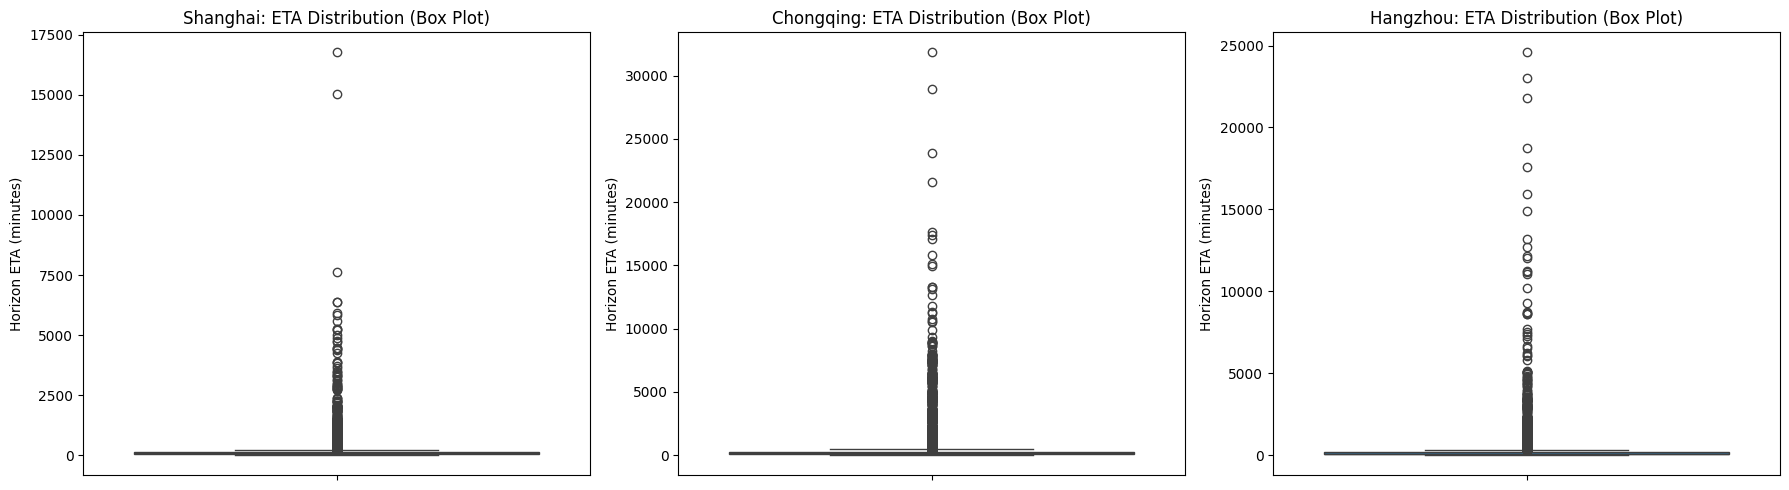

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 5))

# Box plot for Shanghai
plt.subplot(1, 3, 1)
sns.boxplot(y=shanghai_df['horizon_ETA'])
plt.title('Shanghai: ETA Distribution (Box Plot)')
plt.ylabel('Horizon ETA (minutes)')

# Box plot for Chongqing
plt.subplot(1, 3, 2)
sns.boxplot(y=chongqing_df['horizon_ETA'])
plt.title('Chongqing: ETA Distribution (Box Plot)')
plt.ylabel('Horizon ETA (minutes)')

# Box plot for Hangzhou
plt.subplot(1, 3, 3)
sns.boxplot(y=hangzhou_df['horizon_ETA'])
plt.title('Hangzhou: ETA Distribution (Box Plot)')
plt.ylabel('Horizon ETA (minutes)')

plt.tight_layout()
plt.show()

The output above shows the calculated percentiles for the `horizon_ETA` in each city. The 25th and 75th percentiles represent the lower and upper bounds of the interquartile range (the box in the box plot), while the 90th and 99th percentiles give insight into the longer delivery times.

In [15]:
import numpy as np
from scipy.stats import gaussian_kde
from scipy.signal import find_peaks

city_dataframes = {
    'Shanghai': shanghai_df,
    'Chongqing': chongqing_df,
    'Hangzhou': hangzhou_df
}

for city_name, df in city_dataframes.items():
    print(f"\n--- Analysis for {city_name} ---")

    # Convert horizon_ETA from minutes to hours
    eta_hours = df['horizon_ETA'] / 60

    # Ensure there's enough data for KDE, otherwise skip
    if len(eta_hours.dropna()) < 2:
        print("Not enough data to perform KDE and find peaks.")
        # 3. Calculate percentiles even if KDE is skipped
        percentiles_list = [10, 25, 50, 75, 90, 95, 99]
        for p in percentiles_list:
            print(f"{p}th percentile: {np.percentile(eta_hours.dropna(), p):.2f} hours")
        continue

    # 2. Find natural modes/clusters
    # Filter out NaNs if any, as gaussian_kde doesn't handle them
    eta_hours_clean = eta_hours.dropna()
    if len(eta_hours_clean) == 0:
        print("No valid ETA data after dropping NaNs.")
        continue

    density = gaussian_kde(eta_hours_clean)
    # Ensure the range for xs covers the data's range
    x_max = eta_hours_clean.max()
    if x_max == 0:
        print("Max ETA is 0, skipping peak finding.")
        peak_locations = []
    else:
        xs = np.linspace(0, x_max, 1000)
        density_values = density(xs)

        # Find peaks (local maxima) - height parameter might need adjustment based on data
        # Adjust height relative to the max density value or a reasonable absolute value
        height_threshold = density_values.max() * 0.1 # Example: 10% of max density
        peaks, _ = find_peaks(density_values, height=height_threshold)
        peak_locations = xs[peaks]

    if len(peak_locations) > 0:
        print(f"Natural clusters (peaks) at: {[round(p, 2) for p in peak_locations]} hours")
    else:
        print("No significant natural clusters (peaks) found.")

    # 3. Calculate percentiles
    percentiles_list = [10, 25, 50, 75, 90, 95, 99]
    for p in percentiles_list:
        print(f"{p}th percentile: {np.percentile(eta_hours_clean, p):.2f} hours")


--- Analysis for Shanghai ---
Natural clusters (peaks) at: [np.float64(0.84)] hours
10th percentile: 0.38 hours
25th percentile: 0.68 hours
50th percentile: 1.17 hours
75th percentile: 1.90 hours
90th percentile: 2.87 hours
95th percentile: 3.72 hours
99th percentile: 9.18 hours

--- Analysis for Chongqing ---
Natural clusters (peaks) at: [np.float64(2.12)] hours
10th percentile: 0.60 hours
25th percentile: 1.20 hours
50th percentile: 2.28 hours
75th percentile: 3.98 hours
90th percentile: 8.68 hours
95th percentile: 12.08 hours
99th percentile: 53.43 hours

--- Analysis for Hangzhou ---
Natural clusters (peaks) at: [np.float64(1.23)] hours
10th percentile: 0.48 hours
25th percentile: 0.87 hours
50th percentile: 1.52 hours
75th percentile: 2.58 hours
90th percentile: 4.21 hours
95th percentile: 6.68 hours
99th percentile: 13.61 hours


This percentile data shows which values to prioritise .

- Shanghai : 90th percentile is 2.87 hours, the 95th is 3.72 hours, and the 99th is 9.18 hours. This indicates that the vast majority of deliveries in Shanghai are completed relatively quickly and reliably.
- Hangzhou: Its higher percentiles (90th at 4.21 hours, 95th at 6.68 hours, 99th at 13.61 hours) are longer than Shanghai's but considerably shorter than Chongqing's.

-  Chongqing: its higher percentiles are significantly longer: the 90th percentile is 8.68 hours, the 95th is 12.08 hours, and the 99th percentile stretches to 53. 43 hours. This suggests that a notable portion of deliveries in Chongqing can take a very long time, indicating potential logistical challenges or different delivery patterns.

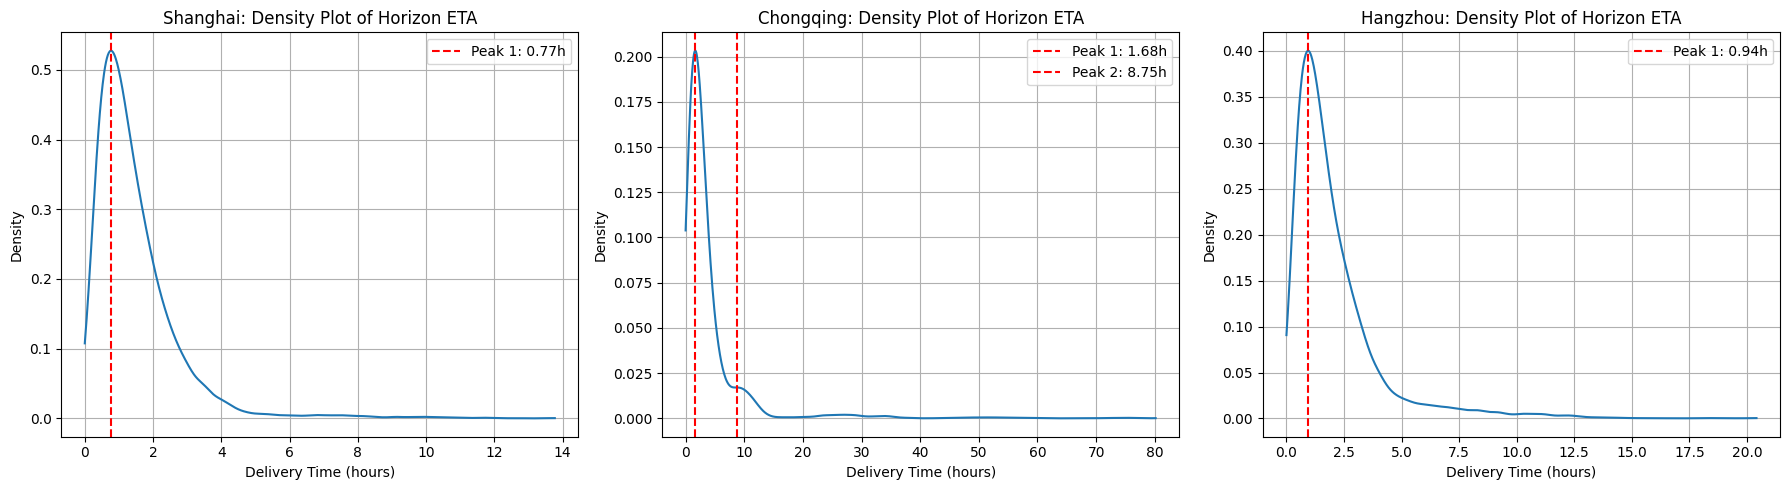

In [16]:
import numpy as np
from scipy.stats import gaussian_kde
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
import seaborn as sns
import os

city_dataframes = {
    'Shanghai': shanghai_df,
    'Chongqing': chongqing_df,
    'Hangzhou': hangzhou_df
}

plt.figure(figsize=(18, 5))

for i, (city_name, df) in enumerate(city_dataframes.items()):
    plt.subplot(1, 3, i + 1)

    # Convert horizon_ETA from minutes to hours and clean data
    eta_hours = df['horizon_ETA'] / 60
    eta_hours_clean = eta_hours.dropna()

    if len(eta_hours_clean) < 2:
        plt.title(f"{city_name}: Not enough data")
        plt.xlabel('Delivery Time (hours)')
        plt.ylabel('Density')
        plt.grid(True)
        continue

    # Determine adaptive x range for plotting and KDE calculation filter
    # Use 99th percentile * 1.5 for upper bound, with a minimum of 10 hours for visibility
    plot_x_max = max(eta_hours_clean.quantile(0.99) * 1.5, 10)

    # Filter data for KDE calculation to focus on the primary distribution
    eta_hours_filtered_for_kde = eta_hours_clean[eta_hours_clean < plot_x_max * 1.1] # Small buffer

    if len(eta_hours_filtered_for_kde) < 2:
        plt.title(f"{city_name}: Not enough filtered data")
        plt.xlabel('Delivery Time (hours)')
        plt.ylabel('Density')
        plt.grid(True)
        continue

    density = gaussian_kde(eta_hours_filtered_for_kde)

    # Generate x-values for plotting the density curve
    xs = np.linspace(0, plot_x_max, 1000)
    density_values = density(xs)

    # Find peaks (local maxima) in the density curve
    # Using a relative height threshold for robustness
    height_threshold = density_values.max() * 0.05 # 5% of max density as threshold
    peaks, _ = find_peaks(density_values, height=height_threshold)
    peak_locations = xs[peaks]

    # Plot the density curve
    plt.plot(xs, density_values)
    plt.title(f'{city_name}: Density Plot of Horizon ETA')
    plt.xlabel('Delivery Time (hours)')
    plt.ylabel('Density')

    # Add vertical lines for peaks if found
    if len(peak_locations) > 0:
        for idx, peak_loc in enumerate(peak_locations):
            plt.axvline(peak_loc, color='red', linestyle='--', label=f'Peak {idx+1}: {peak_loc:.2f}h')
        plt.legend()

    plt.grid(True)

plt.tight_layout()

# Create the plots directory if it doesn't exist
plots_dir = os.path.join(base, '/plots')
os.makedirs(plots_dir, exist_ok=True)

# Save the plot
plt.savefig(os.path.join(plots_dir, 'density_plot_d5c.png'))

plt.show()

this density plot denotes the the probability density. It means that the relative likelihood of observing a data point at a particular value. A higher density value on the y-axis for a certain x-value (ETA) means that ETAs are more concentrated around that particular time.  the area under the density curve over a given range represents the probability of an ETA falling within that range. The total area under the entire curve is always 1.

---
- peaks : Mode - most common or frequent density time
- width : wide spread means large spread in delivery_time

------------------

For Chongqing, the analysis identified a natural cluster (peak) at approximately 2.12 hours. This means that, based on the horizon_ETA data, a delivery time of around 2.12 hours is the most frequently occurring or most likely duration for deliveries in Chongqing. It indicates a central tendency or a common 'cluster' of delivery times around this value.

In [17]:


# Save each DataFrame to a CSV file
shanghai_df.to_csv(base + '/city_divided/shanghai_data.csv', index=False)
chongqing_df.to_csv(base + '/city_divided/chongqing_data.csv', index=False)
hangzhou_df.to_csv(base + '/city_divided/hangzhou_data.csv', index=False)

# Shanghai data

# Task
Identify the `delivery_user_ids` that were dropped from the `shanghai_df`, `chongqing_df`, and `hangzhou_df` DataFrames due to negative `horizon_ETA` values. Then, load the parquet file located at "/content/drive/MyDrive/ml/PROCESSED/matched/tj_processed_join_filtered.parquet" and filter out rows where the `postman_id` matches any of the dropped `delivery_user_ids`. Finally, display the number of dropped IDs, the shape of the parquet DataFrame before and after filtering, and the head of the filtered DataFrame.

## Identify dropped delivery_user_ids

### Subtask:
Re-create city-specific DataFrames including the 'horizon_ETA' before filtering out negative values. Then, compare these 'pre-filtered' delivery_user_ids with the 'post-filtered' delivery_user_ids (from the currently available dataframes) to identify the IDs that were dropped.


**Reasoning**:
To identify the dropped `delivery_user_id`s, I need to first re-create the city-specific DataFrames from the original `wdata` before any filtering for negative ETAs occurred. This involves making a copy of `wdata` and then splitting it by city, calculating `horizon_ETA` for each, and then extracting the `delivery_user_id`s.



In [11]:
wdata_original = wdata.copy()

# Create city-specific DataFrames from wdata_original
shanghai_original_df = wdata_original[wdata_original['from_city_en'] == 'Shanghai'].copy()
chongqing_original_df = wdata_original[wdata_original['from_city_en'] == 'Chongqing'].copy()
hangzhou_original_df = wdata_original[wdata_original['from_city_en'] == 'Hangzhou'].copy()

# Calculate horizon_ETA for original DataFrames
shanghai_original_df['horizon_ETA'] = (shanghai_original_df['sign_time'] - shanghai_original_df['receipt_time']).dt.total_seconds() / 60
chongqing_original_df['horizon_ETA'] = (chongqing_original_df['sign_time'] - chongqing_original_df['receipt_time']).dt.total_seconds() / 60
hangzhou_original_df['horizon_ETA'] = (hangzhou_original_df['sign_time'] - hangzhou_original_df['receipt_time']).dt.total_seconds() / 60

# Extract unique delivery_user_ids from original DataFrames
shanghai_original_ids = set(shanghai_original_df['delivery_user_id'].unique())
chongqing_original_ids = set(chongqing_original_df['delivery_user_id'].unique())
hangzhou_original_ids = set(hangzhou_original_df['delivery_user_id'].unique())

# Extract unique delivery_user_ids from already filtered DataFrames
shanghai_filtered_ids = set(shanghai_df['delivery_user_id'].unique())
chongqing_filtered_ids = set(chongqing_df['delivery_user_id'].unique())
hangzhou_filtered_ids = set(hangzhou_df['delivery_user_id'].unique())

# Find dropped delivery_user_ids for each city
dropped_shanghai_ids = shanghai_original_ids - shanghai_filtered_ids
dropped_chongqing_ids = chongqing_original_ids - chongqing_filtered_ids
dropped_hangzhou_ids = hangzhou_original_ids - hangzhou_filtered_ids

# Combine all dropped delivery_user_ids into a single set
all_dropped_delivery_user_ids = dropped_shanghai_ids.union(dropped_chongqing_ids).union(dropped_hangzhou_ids)

print(f"Number of dropped delivery_user_ids in Shanghai: {len(dropped_shanghai_ids)}")
print(f"Number of dropped delivery_user_ids in Chongqing: {len(dropped_chongqing_ids)}")
print(f"Number of dropped delivery_user_ids in Hangzhou: {len(dropped_hangzhou_ids)}")
print(f"Total unique dropped delivery_user_ids across all cities: {len(all_dropped_delivery_user_ids)}")

Number of dropped delivery_user_ids in Shanghai: 1
Number of dropped delivery_user_ids in Chongqing: 0
Number of dropped delivery_user_ids in Hangzhou: 9
Total unique dropped delivery_user_ids across all cities: 10


**Reasoning**:
Now that the dropped delivery_user_ids have been identified, the next step is to load the specified parquet file, filter it by removing rows where 'postman_id' matches any of the dropped IDs, and then display the shape before and after filtering, along with the head of the filtered DataFrame.



In [12]:
import pandas as pd

# Define the path to the parquet file
parquet_file_path = base + "/tj_processed_join_filtered.parquet"

# Load the parquet file
parquet_df = pd.read_parquet(parquet_file_path)

print(f"Shape of parquet DataFrame before filtering: {parquet_df.shape}")

# Filter out rows where 'postman_id' is in the set of all_dropped_delivery_user_ids
parquet_df_filtered = parquet_df[~parquet_df['postman_id'].isin(all_dropped_delivery_user_ids)]

print(f"Shape of parquet DataFrame after filtering: {parquet_df_filtered.shape}")
print("\nHead of the filtered parquet DataFrame:")
parquet_df_filtered.head()

Shape of parquet DataFrame before filtering: (16042735, 5)
Shape of parquet DataFrame after filtering: (15991938, 5)

Head of the filtered parquet DataFrame:


,ds,postman_id,gps_time,lat,lng
0,321,c79e7a2be7bdf91576321305be86ca6d,2021-03-21 06:58:48,3.233887e+06,1.166449e+06
1,321,c79e7a2be7bdf91576321305be86ca6d,2021-03-21 06:59:08,3.233892e+06,1.166395e+06
2,321,c79e7a2be7bdf91576321305be86ca6d,2021-03-21 06:59:28,3.233888e+06,1.166316e+06
3,321,c79e7a2be7bdf91576321305be86ca6d,2021-03-21 06:59:48,3.233894e+06,1.166308e+06
4,321,c79e7a2be7bdf91576321305be86ca6d,2021-03-21 07:00:08,3.233868e+06,1.166289e+06


## Summary:

### Data Analysis Key Findings

*   A total of 10 unique `delivery_user_ids` were identified as dropped due to negative `horizon_ETA` values across the city-specific DataFrames:
    *   Shanghai: 1 ID
    *   Chongqing: 0 IDs
    *   Hangzhou: 9 IDs
*   The `tj_processed_join_filtered.parquet` DataFrame initially contained 16,042,735 rows and 5 columns.
*   After filtering out rows where the `postman_id` matched any of the 10 dropped `delivery_user_ids`, the DataFrame's shape was reduced to 15,991,938 rows and 5 columns, indicating that 50,807 rows were removed.

### Insights or Next Steps

*   The filtering successfully removed data associated with `delivery_user_ids` that had problematic negative `horizon_ETA` values, which is crucial for maintaining data quality in downstream analyses or machine learning model training.
*   The filtered `tj_processed_join_filtered.parquet` DataFrame is now prepared for further processing, ensuring that anomalous delivery instances from the identified IDs are excluded.


In [13]:
output_parquet_path = base + "/tj_process_negative_removed.parquet"
parquet_df_filtered.to_parquet(output_parquet_path, index=False)
print(f"Filtered parquet file saved to: {output_parquet_path}")

Filtered parquet file saved to: /content/drive/MyDrive/ml/PROCESSED/matched/tj_process_negative_removed.parquet


# Task
Load the `shanghai_data.csv`, `chongqing_data.csv`, and `hangzhou_data.csv` files into separate DataFrames. Extract the unique `delivery_user_id`s from each of these DataFrames. Filter the `parquet_df_filtered` DataFrame to create three new city-specific DataFrames, each containing only the rows where the `postman_id` matches the `delivery_user_id`s of the respective city. Finally, save each of these city-specific DataFrames as separate parquet files in the `/content/drive/MyDrive/ml/PROCESSED/matched/city_divided/` directory.

## Load city-specific data

### Subtask:
Load the `shanghai_data.csv`, `chongqing_data.csv`, and `hangzhou_data.csv` files back into DataFrames to extract the relevant `delivery_user_id`s for each city.


**Reasoning**:
The subtask requires loading city-specific CSV files into DataFrames and extracting unique delivery user IDs. I will use `pd.read_csv` to load each file and then `unique()` to get the IDs, storing them in sets as requested.



In [18]:
import pandas as pd
import os

# Construct the path for the city_divided directory
city_divided_path = os.path.join(base, 'city_divided')

# 1. Load shanghai_data.csv and extract delivery_user_ids
shanghai_df_loaded = pd.read_csv(os.path.join(city_divided_path, 'shanghai_data.csv'))
shanghai_delivery_ids = set(shanghai_df_loaded['delivery_user_id'].unique())

# 2. Load chongqing_data.csv and extract delivery_user_ids
chongqing_df_loaded = pd.read_csv(os.path.join(city_divided_path, 'chongqing_data.csv'))
chongqing_delivery_ids = set(chongqing_df_loaded['delivery_user_id'].unique())

# 3. Load hangzhou_data.csv and extract delivery_user_ids
hangzhou_df_loaded = pd.read_csv(os.path.join(city_divided_path, 'hangzhou_data.csv'))
hangzhou_delivery_ids = set(hangzhou_df_loaded['delivery_user_id'].unique())

print(f"Number of unique delivery_user_ids in Shanghai: {len(shanghai_delivery_ids)}")
print(f"Number of unique delivery_user_ids in Chongqing: {len(chongqing_delivery_ids)}")
print(f"Number of unique delivery_user_ids in Hangzhou: {len(hangzhou_delivery_ids)}")

Number of unique delivery_user_ids in Shanghai: 142
Number of unique delivery_user_ids in Chongqing: 145
Number of unique delivery_user_ids in Hangzhou: 178


**Reasoning**:
Now that the unique delivery user IDs for each city have been extracted, the next step is to filter the `parquet_df_filtered` DataFrame for each city based on these IDs and then save the resulting city-specific DataFrames as parquet files.



In [19]:
import pandas as pd
import os

# Filter parquet_df_filtered for Shanghai
shanghai_parquet_df = parquet_df_filtered[parquet_df_filtered['postman_id'].isin(shanghai_delivery_ids)].copy()

# Filter parquet_df_filtered for Chongqing
chongqing_parquet_df = parquet_df_filtered[parquet_df_filtered['postman_id'].isin(chongqing_delivery_ids)].copy()

# Filter parquet_df_filtered for Hangzhou
hangzhou_parquet_df = parquet_df_filtered[parquet_df_filtered['postman_id'].isin(hangzhou_delivery_ids)].copy()

# Define output directory
output_dir = os.path.join(base, 'city_divided')
os.makedirs(output_dir, exist_ok=True)

# Save city-specific parquet files
shanghai_parquet_df.to_parquet(os.path.join(output_dir, 'shanghai_delivery_data.parquet'), index=False)
chongqing_parquet_df.to_parquet(os.path.join(output_dir, 'chongqing_delivery_data.parquet'), index=False)
hangzhou_parquet_df.to_parquet(os.path.join(output_dir, 'hangzhou_delivery_data.parquet'), index=False)

print(f"Shanghai parquet data shape: {shanghai_parquet_df.shape}")
print(f"Chongqing parquet data shape: {chongqing_parquet_df.shape}")
print(f"Hangzhou parquet data shape: {hangzhou_parquet_df.shape}")

print("City-specific parquet files saved to: " + output_dir)

Shanghai parquet data shape: (3592545, 5)
Chongqing parquet data shape: (4914746, 5)
Hangzhou parquet data shape: (7484647, 5)
City-specific parquet files saved to: /content/drive/MyDrive/ml/PROCESSED/matched/city_divided
